In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


## Importing the data

In [31]:
# Import ZHVI; this data is for all homes (SFR, condos and co-ops) smoothed and seasonally adjusted  

csvpath = '/Users/laceymorgan/Desktop/Zillow_target_city_analysis/data/Metro_zhvi_2_16_2023.csv'
df1 = pd.read_csv(csvpath)

In [32]:
# Import For-Sale Inventory: The count of unique listings that were active at any time in a given month.

csvpath2 = '/Users/laceymorgan/Desktop/Zillow_target_city_analysis/data/Metro_invt_2_16_2023.csv'
df2 = pd.read_csv(csvpath2)

In [33]:
# Import Median List Price: The median price at which homes were listed, data is smoothed for all homes monthly

csvpath3 = '/Users/laceymorgan/Desktop/Zillow_target_city_analysis/data/Metro_mlp_2_16_2023.csv'
df3 = pd.read_csv(csvpath3)

In [34]:
# Import Median Sale Price: The median price at which homes were sold, data is smoothed for all homes monthly

csvpath4 = '/Users/laceymorgan/Desktop/Zillow_target_city_analysis/data/Metro_msp_2_16_2023.csv'
df4 = pd.read_csv(csvpath4)

In [35]:
# creating data frames of just the target cities median home values over time
mpls = df1.loc[df1['RegionName'] == 'Minneapolis, MN'].copy()
prt = df1.loc[df1['RegionName'] == 'Portland, OR'].copy()
stl = df1.loc[df1['RegionName'] == 'Seattle, WA'].copy()
bldr = df1.loc[df1['RegionName'] == 'Boulder, CO'].copy()


In [36]:
mpls.iloc[:, 5:]

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
16,136674.153274,137126.042022,137530.764349,138499.756365,139570.934134,140844.021433,142255.467273,144236.957543,146262.655387,148315.849984,149960.143908,151709.152314,153349.616984,154853.918455,156365.034982,157953.464729,159523.132188,161072.912978,162701.983583,164535.552715,166521.326318,168610.420309,170599.966294,172278.261281,173626.040711,174697.495051,175666.674676,176576.837017,177866.779235,179220.721727,180732.82212,182077.274525,183474.19141,184834.7068,186245.796794,187792.436053,189334.771436,190756.528899,192076.437408,193367.405003,194771.150648,196111.601989,197510.603167,198833.796206,200224.392311,201511.053472,202876.643243,204230.972751,205524.284911,206806.188413,208032.96054,209468.811636,211000.180397,212695.852545,214294.105353,215726.644027,217092.805594,218328.527949,219411.432227,220451.081669,221726.005557,223167.682339,224403.25221,225726.849318,227122.557467,228559.27685,229686.036343,230440.86682,23121

In [37]:
# # get a Series indicating which columns have at least one NaN value
# has_nans = bldr.isna().any()

# # filter the DataFrame to only include columns with at least one NaN value
# df_filtered = bldr.loc[:, has_nans]

# print(df_filtered)

## Plotting the Zillow Home Value Index for all 4 target cities over the entire timeframe of the data


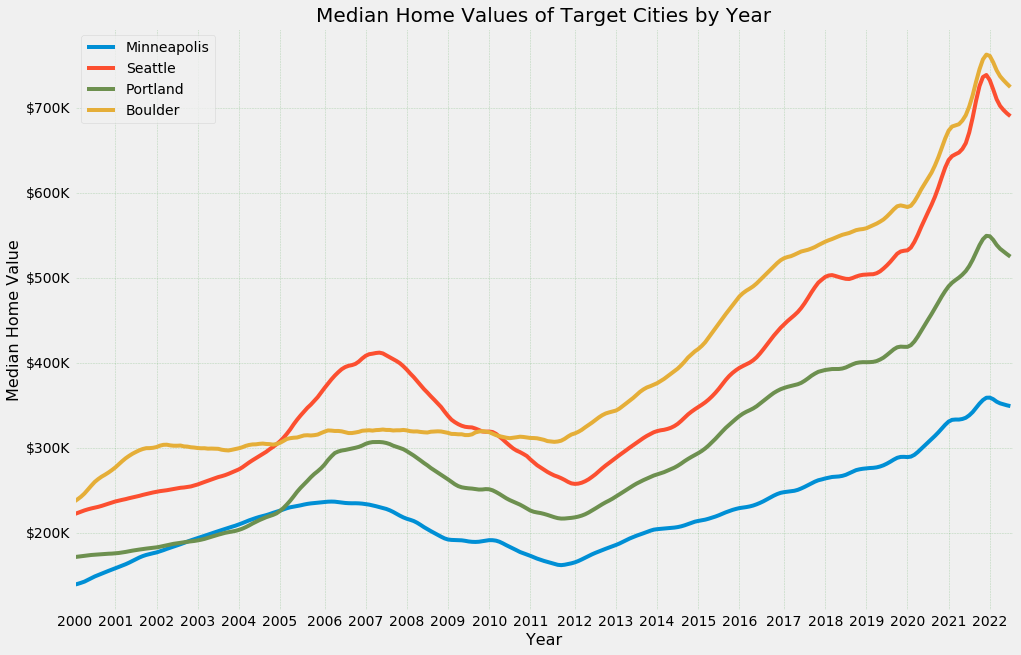

In [38]:

# set the figure size
plt.figure(figsize=(15,10))

# converting the data to float type, float64 type was causing an error
mpls.iloc[:, 5:] = mpls.iloc[:, 5:].astype(float)
stl.iloc[:, 5:] = stl.iloc[:, 5:].astype(float)
prt.iloc[:, 5:] = prt.iloc[:, 5:].astype(float)
bldr.iloc[:, 5:] = bldr.iloc[:, 5:].astype(float)

# select the relevant columns for plotting
mpls_data = mpls.iloc[0, 8:]
stl_data = stl.iloc[0, 8:]
prt_data = prt.iloc[0, 8:]
bldr_data = bldr.iloc[0, 8:]

# create the line plot
plt.plot(mpls_data, label='Minneapolis', color=color_pal[0])
plt.plot(stl_data, label='Seattle', color=color_pal[1])
plt.plot(prt_data, label='Portland', color=color_pal[3])
plt.plot(bldr_data, label='Boulder', color=color_pal[2])

# add labels and a title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Median Home Value', fontsize=16)
plt.title('Median Home Values of Target Cities by Year', fontsize=20)

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2000-01-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2000-01-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels)

# format the y-axis labels to display values in millions of dollars with a decimal place
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_data))

# add a legend
plt.legend(loc='best')

#tight layout so it looks its best
# plt.tight_layout()

# Save your graph as a PNG file in the "visualizations" folder
plt.savefig('/Users/laceymorgan/Desktop/Zillow_target_city_analysis/figures/median_values_all_cities.png', dpi=300)

# show the plot
plt.show()


## Plotting the line regression of the Zillow Home Value Index for all 4 target cities over the entire timeframe of the data


The correlation coefficient (r) for the Minneapolis data is: 0.7529115804167021
The correlation coefficient (r) for the Seattle data is: 0.8127920920000936
The correlation coefficient (r) for the Portland data is: 0.8782817599022293
The correlation coefficient (r) for the Boulder data is: 0.8932773099011462


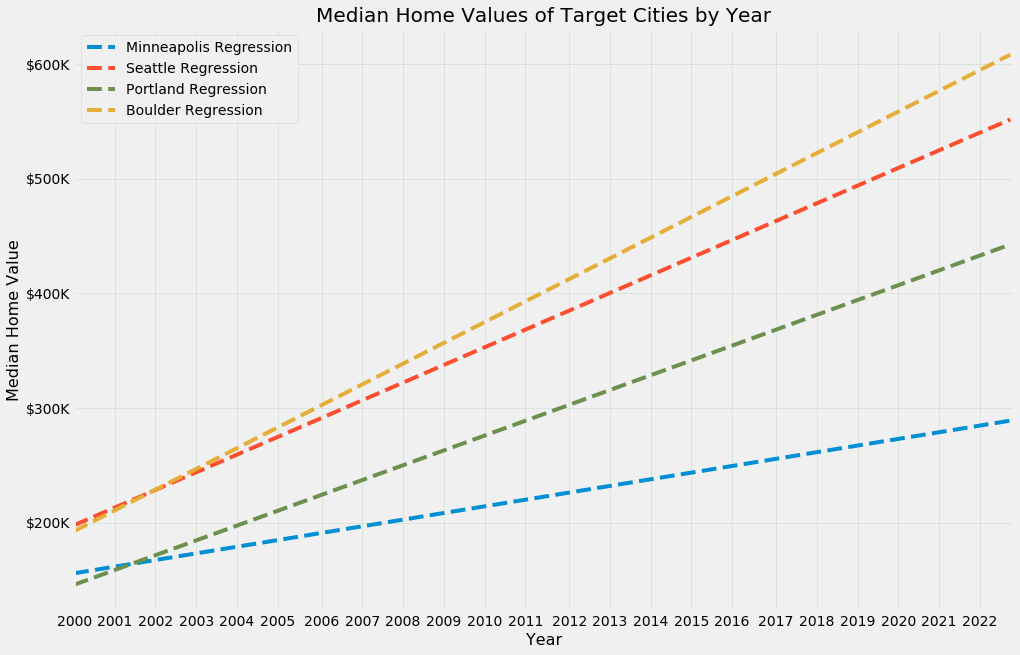

In [39]:
# plotting ZHVI regression lines for all 4 target cities over the 
# entire timeframe of the data

# set the figure size
plt.figure(figsize=(15,10))

mpls_data = pd.to_numeric(mpls.iloc[0, 5:], errors='coerce')
stl_data = pd.to_numeric(stl.iloc[0, 5:], errors='coerce')
prt_data = pd.to_numeric(prt.iloc[0, 5:], errors='coerce')
bldr_data = pd.to_numeric(bldr.iloc[0, 5:], errors='coerce')


# calculate the slope of each line using linregress() and create equation of line
(mpls_slope, mpls_int, mpls_r, mpls_p, mpls_std_err) = linregress(np.arange(len(mpls_data)), mpls_data)
mpls_fit = (mpls_slope * np.arange(len(mpls_data))) + mpls_int
# print the r value
print("The correlation coefficient (r) for the Minneapolis data is:", mpls_r)

# calculate the slope of each line using linregress() and create equation of line
(stl_slope, stl_int, stl_r, stl_p, stl_std_err) = linregress(np.arange(len(stl_data)), stl_data)
stl_fit = (stl_slope * np.arange(len(stl_data))) + stl_int
# print the r value
print("The correlation coefficient (r) for the Seattle data is:", stl_r)

# calculate the slope of each line using linregress() and create equation of line
(prt_slope, prt_int, prt_r, prt_p, prtl_std_err) = linregress(np.arange(len(prt_data)), prt_data)
prt_fit = (prt_slope * np.arange(len(prt_data))) + prt_int
# print the r value
print("The correlation coefficient (r) for the Portland data is:", prt_r)

# calculate the slope of each line using linregress() and create equation of line
(bldr_slope, bldr_int, bldr_r, bldr_p, bldr_std_err) = linregress(np.arange(len(bldr_data)), bldr_data)
bldr_fit = (bldr_slope * np.arange(len(bldr_data))) + bldr_int
# print the r value
print("The correlation coefficient (r) for the Boulder data is:", bldr_r)

# plot the regression lines for each city
plt.plot(mpls_fit, label='Minneapolis Regression', color=color_pal[0], linestyle='--')
plt.plot(stl_fit, label='Seattle Regression', color=color_pal[1], linestyle='--')
plt.plot(prt_fit, label='Portland Regression', color=color_pal[3], linestyle='--')
plt.plot(bldr_fit, label='Boulder Regression', color=color_pal[2], linestyle='--')

# add labels and a title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Median Home Value', fontsize=16)
plt.title('Median Home Values of Target Cities by Year', fontsize=20)

dates = pd.date_range(start='2000-01-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2000-01-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels)

# format the y-axis labels to display values in millions of dollars with a decimal place
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_data))

# add a legend
plt.legend(loc='best')

# Save the graph as a PNG file in the visualizations folder
plt.savefig('/Users/laceymorgan/Desktop/Zillow_target_city_analysis/figures/median_values__linregress_all_cities.png', dpi=300)

# show the plot
plt.show()

* The correlation coefficients (r) for median home values in Minneapolis, Seattle, Portland, and Boulder are 0.75, 0.81, 0.88, and 0.89, respectively. These values suggest a moderate to strong positive correlation between the years and the median home values in each of these cities. The highest correlation is seen in Portland, indicating a stronger relationship between time and home values in that city compared to the others. However, it's worth noting that a correlation coefficient alone does not necessarily imply causation, and other factors may be influencing these trends. Nonetheless, these values provide insight into how the median home values have changed over time in these cities and can help inform decisions related to real estate and investment.

## Plotting the for sale inventory for the target cities for 2018-2022

In [40]:
# creating data frames of just the target cities home inventory over time, data from DF2
mpls_inv = df2.loc[(df2['RegionName'] == 'Minneapolis, MN')].copy()
prt_inv = df2.loc[(df2['RegionName'] == 'Portland, OR')].copy()
stl_inv = df2.loc[(df2['RegionName'] == 'Seattle, WA')].copy()
bldr_inv = df2.loc[(df2['RegionName'] == 'Boulder, CO')].copy()

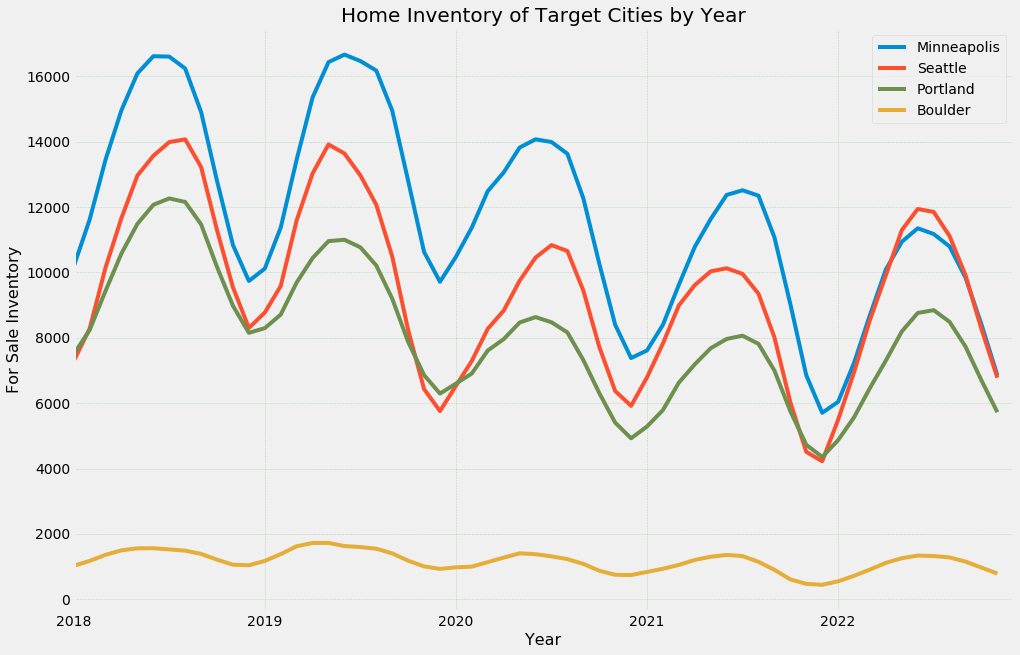

In [41]:
# plotting all 4 target cities inventory over the entire course of the data

# set the figure size
plt.figure(figsize=(15,10))

# converting the data to float type, float64 type was causing an error
mpls_inv.iloc[0, 5:] = mpls_inv.iloc[0, 5:].astype(float)
stl_inv.iloc[0, 5:] = stl_inv.iloc[0, 5:].astype(float)
prt_inv.iloc[0, 5:] = prt_inv.iloc[0, 5:].astype(float)
bldr_inv.iloc[0, 5:] = bldr_inv.iloc[0, 5:].astype(float)

# select the relevant columns for plotting
mpls_inv_data = mpls_inv.iloc[0, 5:]
stl_inv_data = stl_inv.iloc[0, 5:]
prt_inv_data = prt_inv.iloc[0, 5:]
bldr_inv_data = bldr_inv.iloc[0, 5:]

# create the line plot
plt.plot(mpls_inv_data, label='Minneapolis', color=color_pal[0])
plt.plot(stl_inv_data, label='Seattle', color=color_pal[1])
plt.plot(prt_inv_data, label='Portland', color=color_pal[3])
plt.plot(bldr_inv_data, label='Boulder', color=color_pal[2])

# add labels and a title
plt.xlabel('Year', fontsize=16)
plt.ylabel('For Sale Inventory', fontsize=16)
plt.title('Home Inventory of Target Cities by Year', fontsize=20)

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# Save the graph as a PNG file in the visualizations folder
plt.savefig('/Users/laceymorgan/Desktop/Zillow_target_city_analysis/figures/inventory_all_cities.png', dpi=300)

# show the plot
plt.show()


## Plotting the median list prices for all target cities for 2018-2022

In [42]:
# creating data frames of just the target cities median list prices over time
mpls_lst = df3.loc[(df3['RegionName'] == 'Minneapolis, MN')].copy()
prt_lst = df3.loc[(df3['RegionName'] == 'Portland, OR')].copy()
stl_lst = df3.loc[(df3['RegionName'] == 'Seattle, WA')].copy()
bldr_lst = df3.loc[(df3['RegionName'] == 'Boulder, CO')].copy()

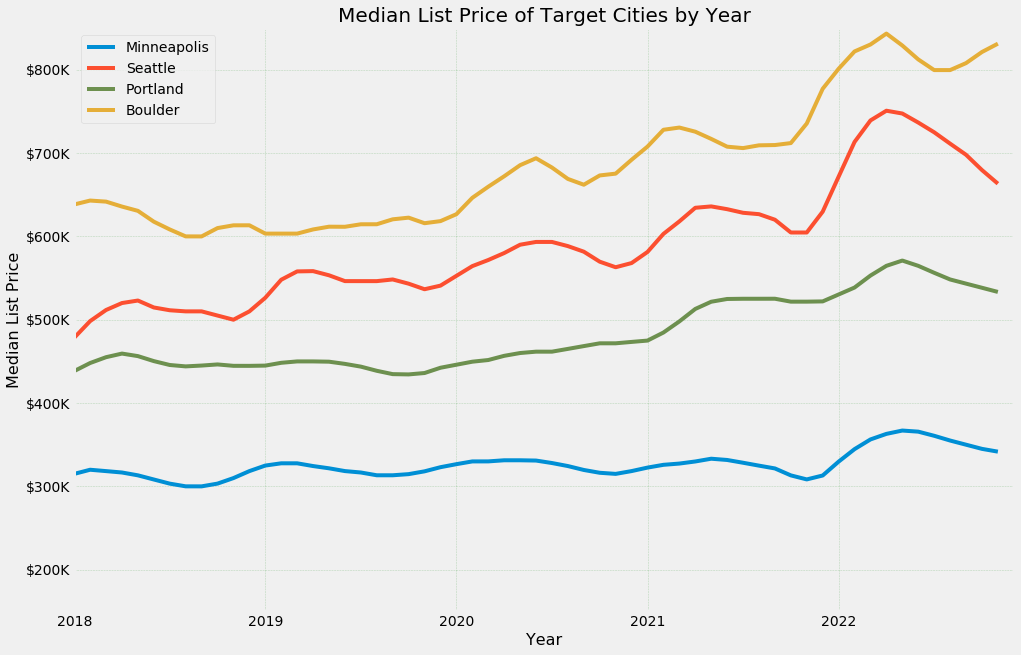

In [43]:
# set the figure size
plt.figure(figsize=(15, 10))

# converting the data to float type, float64 type was causing an error
mpls_lst.iloc[0, 5:] = mpls_lst.iloc[0, 5:].astype(float)
stl_lst.iloc[0, 5:] = stl_lst.iloc[0, 5:].astype(float)
prt_lst.iloc[0, 5:] = prt_lst.iloc[0, 5:].astype(float)
bldr_lst.iloc[0, 5:] = bldr_lst.iloc[0, 5:].astype(float)

# select the relevant columns for plotting
mpls_lst_data = mpls_lst.iloc[0, 5:]
stl_lst_data = stl_lst.iloc[0, 5:]
prt_lst_data = prt_lst.iloc[0, 5:]
bldr_lst_data = bldr_lst.iloc[0, 5:]

# create the line plot
plt.plot(mpls_lst_data, label='Minneapolis', color=color_pal[0])
plt.plot(stl_lst_data, label='Seattle', color=color_pal[1])
plt.plot(prt_lst_data, label='Portland', color=color_pal[3])
plt.plot(bldr_lst_data, label='Boulder', color=color_pal[2])

# add labels and a title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Median List Price', fontsize=16)
plt.title('Median List Price of Target Cities by Year', fontsize=20)

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels)

plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x and y-limits
plt.xlim(0, len(mpls_inv_data))
plt.ylim(150000, 850000)

# add a legend
plt.legend(loc='best')

# plt.tight_layout()

# Save the graph as a PNG file in the visualizations folder
plt.savefig('/Users/laceymorgan/Desktop/Zillow_target_city_analysis/figures/median_list_price_all_cities.png', dpi=300)

# show the plot
plt.show()


## Plotting the median list vs sales price for all four cities 2018-2022

In [44]:
# creating data frames of just the target cities sale prices over time
mpls_sale = df4.loc[(df4['RegionName'] == 'Minneapolis, MN')].copy()
prt_sale = df4.loc[(df4['RegionName'] == 'Portland, OR')].copy()
stl_sale = df4.loc[(df4['RegionName'] == 'Seattle, WA')].copy()
bldr_sale = df4.loc[(df4['RegionName'] == 'Boulder, CO')].copy()

# select the relevant columns for plotting
mpls_sale_data = mpls_sale.iloc[0, 5:]
stl_sale_data = stl_sale.iloc[0, 5:]
prt_sale_data = prt_sale.iloc[0, 5:]
bldr_sale_data = bldr_sale.iloc[0, 5:]

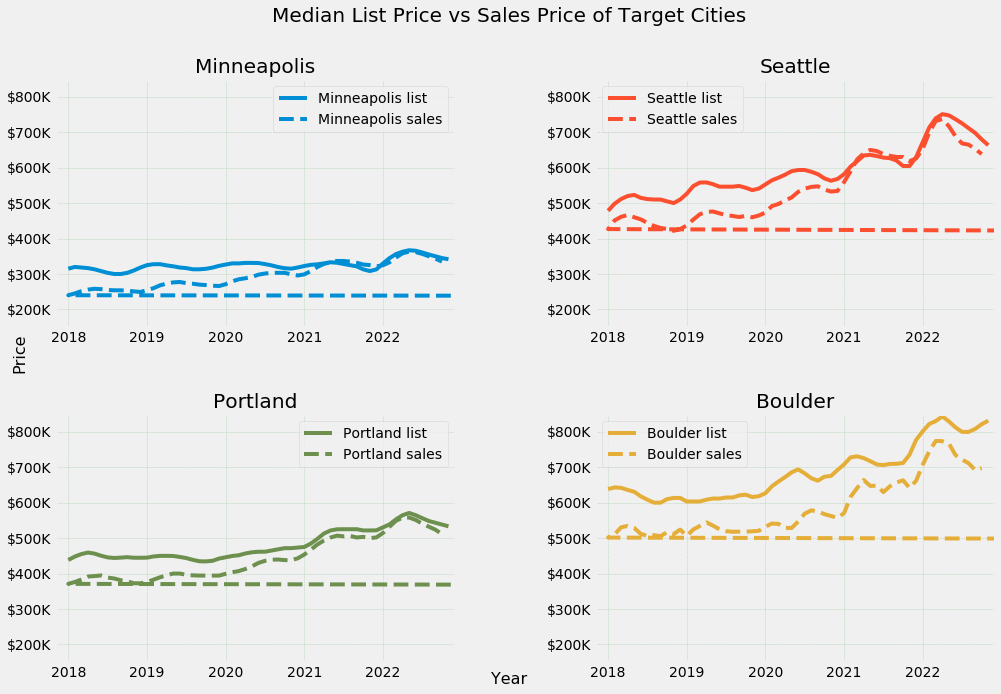

In [45]:
# create a 2x2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# set the titles for each subplot
axs[0, 0].set_title('Minneapolis')
axs[0, 1].set_title('Seattle')
axs[1, 0].set_title('Portland')
axs[1, 1].set_title('Boulder')

# create the line plots for each city
axs[0, 0].plot(mpls_lst_data, label='Minneapolis list', color=color_pal[0])
axs[0, 0].plot(mpls_sale_data, label='Minneapolis sales', color=color_pal[0], linestyle='--')
axs[0, 1].plot(stl_lst_data, label='Seattle list', color=color_pal[1])
axs[0, 1].plot(stl_sale_data, label='Seattle sales', color=color_pal[1], linestyle='--')
axs[1, 0].plot(prt_lst_data, label='Portland list', color=color_pal[3])
axs[1, 0].plot(prt_sale_data, label='Portland sales', color=color_pal[3], linestyle='--')
axs[1, 1].plot(bldr_lst_data, label='Boulder list', color=color_pal[2])
axs[1, 1].plot(bldr_sale_data, label='Boulder sales', color=color_pal[2], linestyle='--')

# add x and y labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Price', va='center', rotation='vertical', fontsize=16)

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
for ax in axs.flat:
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.set_ylim(150000, 850000)  # set y-limits

# apply the y-axis label formatting to all subplots
for ax in axs.flat:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

    # set proporties for the grid 
    ax.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

    # set the x-limits
    ax.set_xlim(-2, len(mpls_lst_data))

    # add a legend
    ax.legend(loc='best')

# adjust the spacing between subplots
fig.subplots_adjust(hspace=0.35, wspace=0.35)

# set title
fig.suptitle('Median List Price vs Sales Price of Target Cities', fontsize=20)

# Save your graph as a PNG file in the "visualizations" folder
plt.savefig('/Users/laceymorgan/Desktop/Zillow_target_city_analysis/figures/sales_v_list_all.png', dpi=300)

# show the plot
plt.show()
